<a href="https://colab.research.google.com/github/myarist/Dicoding/blob/main/Project/Air%20Quality%20-%20Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Air Quality
- **Nama:** Muhammad Yusuf Aristyanto
- **Email:** aristyanto2320@gmail.com
- **ID Dicoding:** myarist



---



## Menentukan Pertanyaan Bisnis

1. Bagaimana **tren kualitas udara** di Aotizhongxin selama periode 2013-2017?
  - Dapat membantu memantau perubahan kualitas udara secara jangka panjang dan mengidentifikasi tren polusi yang perlu ditangani.
2. Apakah **ada pola musiman** dalam kualitas udara?
  - Membantu mengembangkan kebijakan yang mengurangi polusi udara akibat aktivitas manusia, seperti pengaturan lalu lintas dan promosi transportasi umum.
5. Apa **dampak dari kejadian cuaca ekstrem** (seperti hujan atau angin kencang) terhadap kualitas udara?
  - Melakukan mitigasi polusi yang memperhatikan kejadian cuaca ekstrem, misalnya dengan mempersiapkan sistem peringatan dini saat terjadi hujan atau angin kencang.
6. Bagaimana kualitas udara di Aotizhongxin dibandingkan dengan **standar kualitas udara** yang ditetapkan oleh WHO?
  - Memberikan dasar untuk pejabat kesehatan masyarakat untuk mengambil tindakan terkait dampak kesehatan akibat polusi udara, seperti mengeluarkan peringatan kesehatan atau program pencegahan.
7. Apa **faktor-faktor yang paling berkontribusi** terhadap peningkatan polusi udara?
  - Mengidentifikasi sumber polusi utama dan merancang kebijakan pengendalian polusi yang lebih efektif, seperti pembatasan emisi dari industri atau kendaraan bermotor.




---



## Import Semua Packages/Library yang Digunakan

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir('/content/drive/MyDrive/BPS/Coding/Dicoding/Belajar_Analisis_Data_dengan_Python/Project')

Mounted at /content/drive/


In [ ]:
import numpy as np                # Untuk operasi numerik dan array
import pandas as pd               # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt   # Untuk visualisasi data statis
import seaborn as sns             # Untuk visualisasi data yang lebih menarik dan informatif
import datetime                   # Untuk manipulasi dan analisis data tanggal


---



## Data Wrangling

### Gathering Data

#### Di sini, kita hanya akan menggunakan data PRSA_Data_Aotizhongxin_20130301-20170228.csv

In [ ]:
air_quality_data = pd.read_csv('Data/air_quality/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
air_quality_data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


Menampilkan informasi dasar tentang data per jam

In [ ]:
print(air_quality_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


Insight dari hasil .info() pada data air_quality_data

* Jumlah Data dan Kolom:
   - Terdapat 43824 baris (data) dan 13 kolom (fitur).

* Tipe Data:
   - Sebagian besar data berupa tipe integer (int64), yang mengindikasikan data numerik.
   - Kolom 'cbwd' memiliki tipe object, kemungkinan merupakan data kategorikal (misalnya, arah angin).
   - Kolom 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'

* Missing Value (Nilai yang Hilang):
   - Berdasarkan kolom 'Non-Null Count', terlihat bahwa ada beberapa kolom yang memiliki jumlah data non-null yang kurang dari 43824.
   - Hal ini menunjukkan adanya missing value (data yang hilang) pada beberapa kolom.

Kesimpulan:
   - Data ini merupakan data time-series (data yang diukur berdasarkan waktu) yang berkaitan dengan kualitas udara.
   - Terdapat missing value, yang perlu ditangani agar tidak mempengaruhi analisis selanjutnya.
   - Data ini dapat digunakan untuk menjawab pertanyaan bisnis seperti tren kualitas udara, pengaruh cuaca, pola musiman, dan dampak kejadian cuaca ekstrem terhadap kualitas udara.

Tindak Lanjut

a. Menangani missing value (misalnya, dengan pengisian data atau penghapusan data).


In [ ]:
# Sebelum Penanganan Missing Values
print("Jumlah missing value sebelum ditangani:")
print(air_quality_data.isnull().sum())

# Pilih pada kolom numerik saja
numeric_columns = air_quality_data.select_dtypes(include=np.number).columns

# Hitung rata-rata (mean)
column_means = air_quality_data[numeric_columns].mean()

# Isi missing values dengan mean
air_quality_data[numeric_columns] = air_quality_data[numeric_columns].fillna(column_means)

# Setelah Penanganan Missing Values**
print("\nJumlah missing value setelah ditangani:")
print(air_quality_data[numeric_columns].isnull().sum())

Jumlah missing value sebelum ditangani:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Jumlah missing value setelah ditangani:
No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64


Missing value berhasil ditangani

b. Melakukan analisis deskriptif untuk memahami distribusi data pada setiap kolom.

In [ ]:
print(air_quality_data.describe())  # Melihat statistik deskriptif untuk kolom numerik

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       81.045038     94.243001     22.516658    

Insight dari hasil .describe() pada data air_quality_data

* Statistik Deskriptif:
  - Fungsi .describe() memberikan gambaran statistik umum seperti mean (rata-rata), standar deviasi, nilai minimum, kuartil (25%, 50%, 75%), dan nilai maksimum untuk setiap kolom numerik.

* Kualitas Udara:
  - Rata-rata PM2.5 (partikulat matter 2.5 mikrometer) sekitar 79.79, dengan standar deviasi yang cukup tinggi. Ini menunjukkan bahwa ada variasi kualitas udara yang signifikan.
  - Nilai PM10, SO2, NO2, CO, dan O3 juga menunjukkan variasi yang cukup besar dalam kualitas udara.

* Suhu, Tekanan, Titik Embun, dan Kecepatan Angin:
  - Data suhu (TEMP) memiliki rata-rata sekitar 13.57 derajat Celcius.
  - Data tekanan (PRES) memiliki rata-rata sekitar 1016.45 hPa.
  - Data titik embun (DEWP) memiliki rata-rata sekitar 3.0.
  - Data kecepatan angin (WSPM) memiliki rata-rata sekitar 1.74.

* Curah Hujan:
  - Curah hujan (RAIN) memiliki rata-rata sekitar 0.06, dengan standar deviasi yang relatif kecil.

Kesimpulan:
  - Statistik deskriptif ini memberikan gambaran awal tentang data kualitas udara, suhu, tekanan, titik embun, curah hujan, dan kecepatan angin.
  -  Ada variasi yang cukup besar dalam beberapa parameter kualitas udara, yang menunjukkan bahwa perlu dilakukan analisis lebih lanjut untuk memahami pola dan tren dalam data.
  -  Data ini dapat digunakan untuk menganalisis pengaruh variabel-variabel seperti suhu, tekanan, dan curah hujan terhadap kualitas udara.


c. Mengecek apakah terdapat outlier atau nilai yang tidak wajar pada beberapa kolom

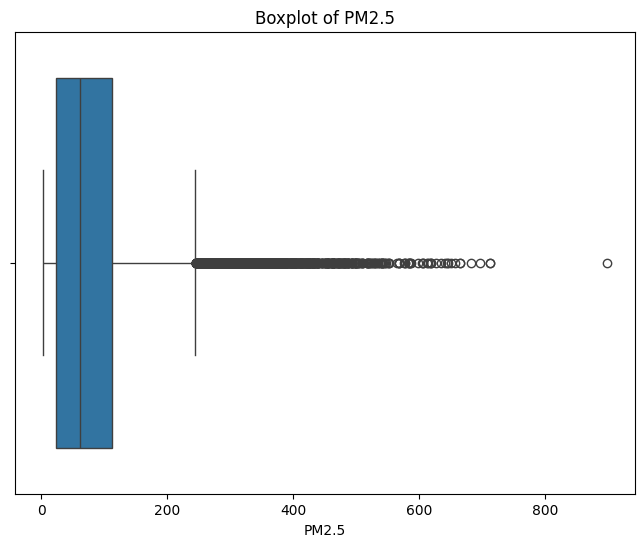

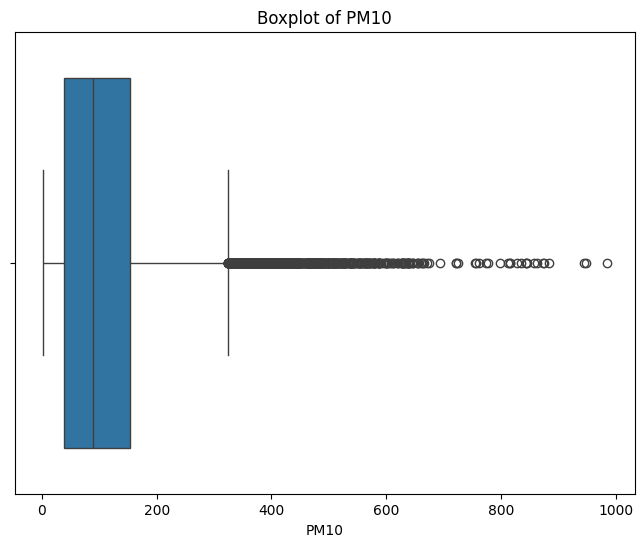

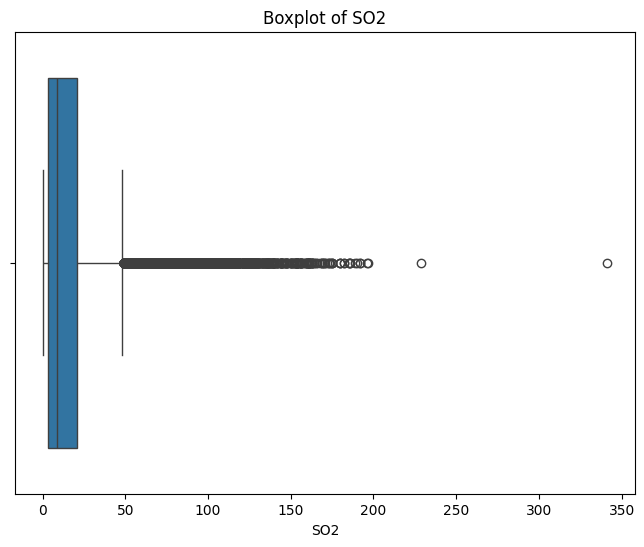

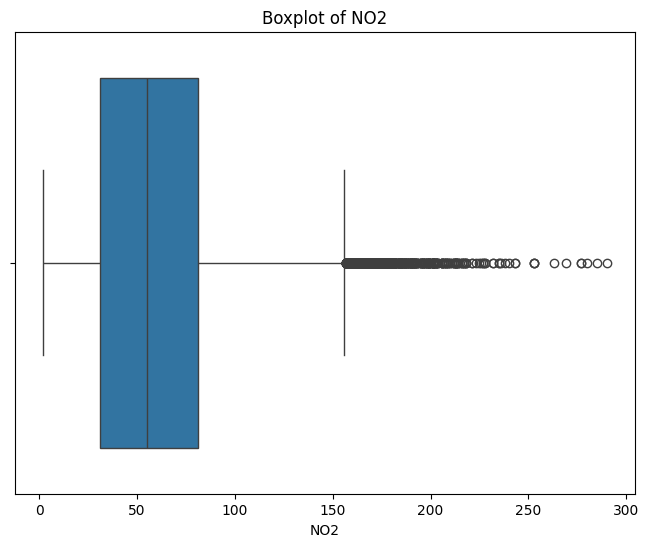

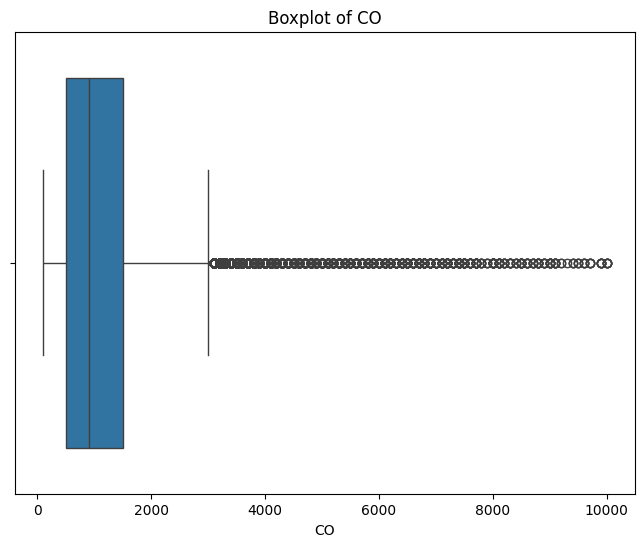

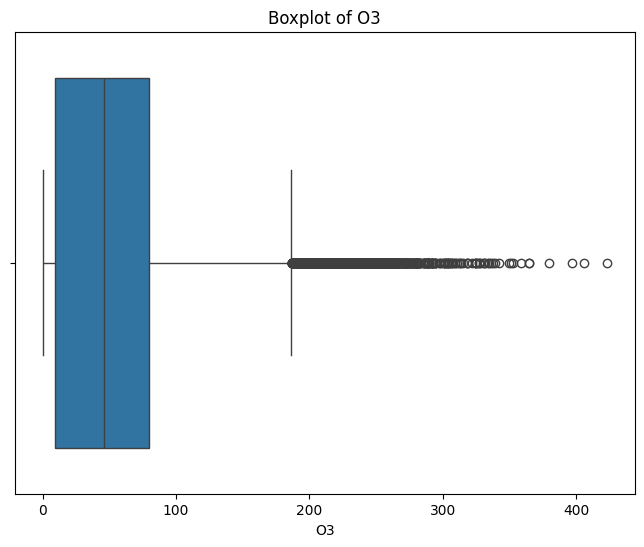

In [ ]:
# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers

# Pilih kolom-kolom yang akan diperiksa outliernya
columns_to_check = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Visualisasi data dengan boxplot untuk melihat outlier masing masing
for column in columns_to_check:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=column, data=air_quality_data)
  plt.title(f'Boxplot of {column}')
  plt.show()


Insight dari Visualisasi Boxplot

Berdasarkan boxplot yang dihasilkan untuk kolom-kolom 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', kita dapat mengamati adanya outlier yang cukup signifikan pada sebagian besar kolom, terutama pada 'PM2.5' dan 'PM10'. Outlier menunjukkan nilai-nilai yang berada jauh di luar rentang data normal, yang mungkin disebabkan oleh kesalahan pengukuran, kejadian ekstrem, atau faktor lain.

Tindak Lanjut

Penanganan outlier dengan *winsorizing*

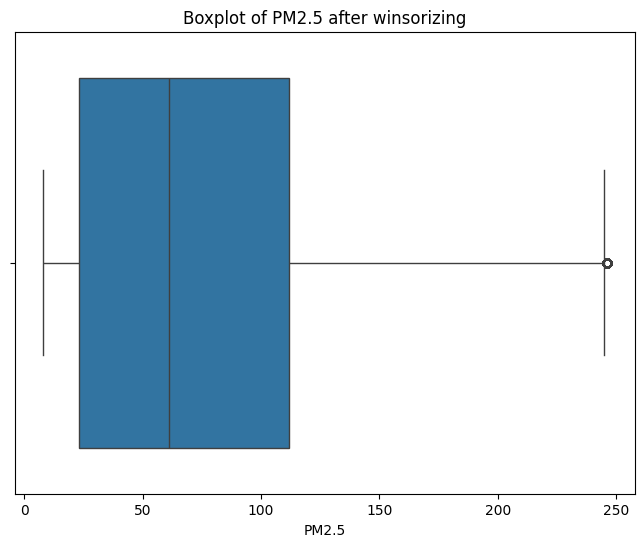

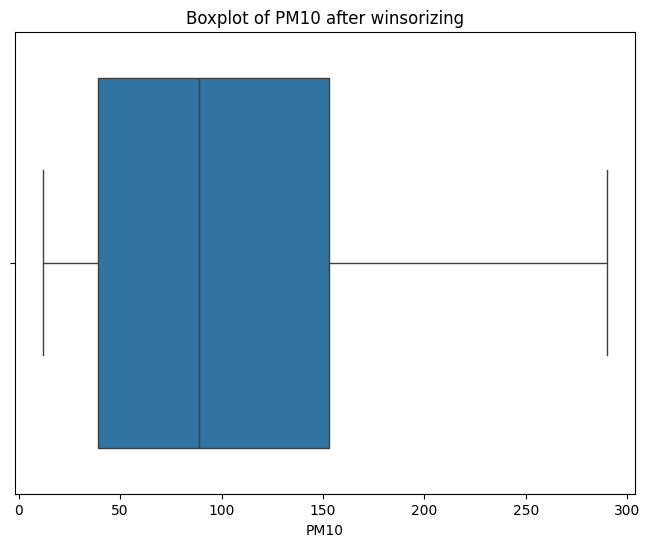

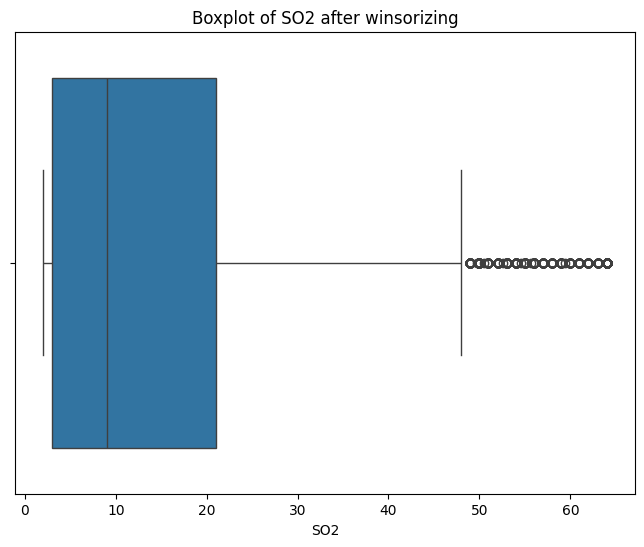

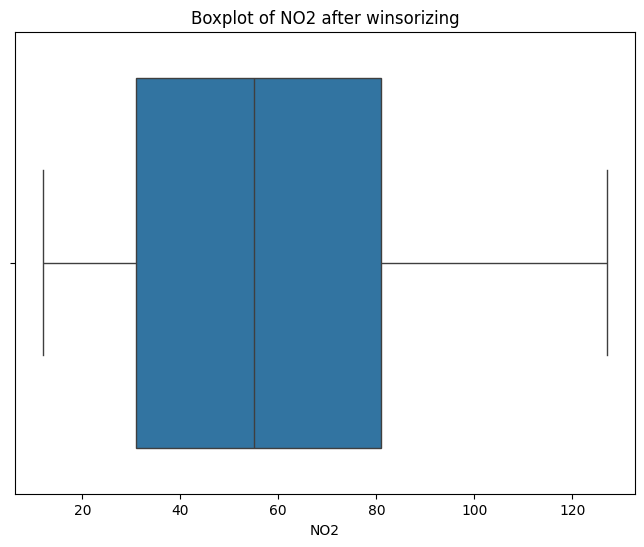

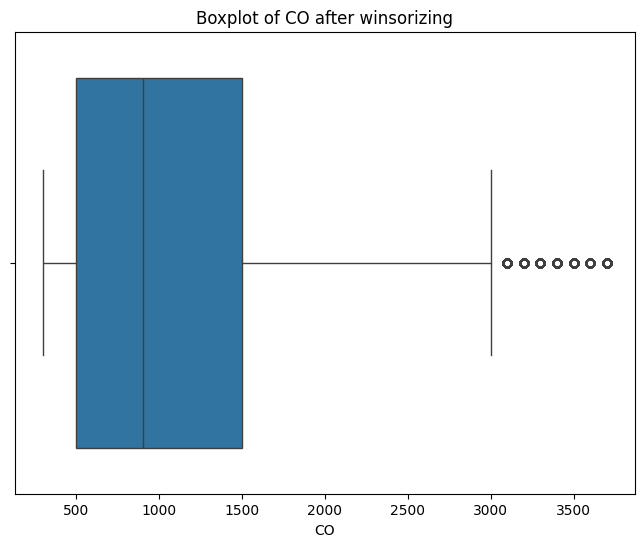

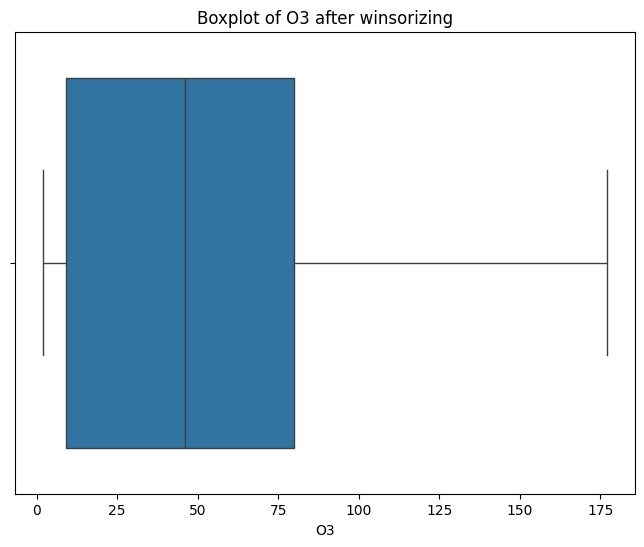

In [ ]:
# Menentukan batas atas dan bawah untuk winsorizing
def winsorize(data, lower_percentile=0.05, upper_percentile=0.95):
  lower_bound = data.quantile(lower_percentile)
  upper_bound = data.quantile(upper_percentile)
  data = np.clip(data, lower_bound, upper_bound)
  return data

for column in columns_to_check:
  air_quality_data[column] = winsorize(air_quality_data[column])

# Boxplot setelah winsorizing
for column in columns_to_check:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=column, data=air_quality_data)
  plt.title(f'Boxplot of {column} after winsorizing')
  plt.show()

langkah-langkah yang telah dilakukan dalam menangani outlier pada data kualitas udara sudah cukup baik. Namun, perlu dipertimbangkan efek yang mungkin ditimbulkan oleh winsorizing.

Efek yang mungkin ditimbulkan oleh winsorizing:
* Hilangnya informasi: Winsorizing dapat menyebabkan hilangnya informasi tentang variasi data yang sebenarnya,
   karena nilai-nilai outlier digantikan dengan nilai batas.
* Bias pada analisis statistik: Jika outlier mewakili fenomena nyata,
   mengubah nilainya dapat menyebabkan bias pada analisis statistik seperti rata-rata dan standar deviasi.

Saran untuk mempertimbangkan langkah selanjutnya:
1. Investigasi lebih lanjut: Sebelum menerapkan winsorizing,
   usahakan untuk memahami penyebab outlier. Apakah outlier disebabkan oleh kesalahan pengukuran,
   atau apakah mewakili fenomena nyata yang penting?
2. Alternatif penanganan outlier: Terdapat alternatif lain selain winsorizing, seperti:
  - Menghapus data outlier jika jumlahnya sedikit dan tidak mewakili fenomena penting.
  - Transformasi data: Misalnya, transformasi logaritmik dapat membantu mengurangi pengaruh outlier.
  - Menggunakan model machine learning yang robust terhadap outlier.
3. Validasi: Setelah penanganan outlier,
   lakukan validasi untuk memastikan bahwa langkah yang diambil tidak menyebabkan bias atau hilangnya informasi yang signifikan.
4. Pertimbangkan konteks: Efek winsorizing dan pilihan metode penanganan outlier bergantung pada konteks dan tujuan analisis. Jika tujuannya adalah untuk memahami tren umum dalam data, winsorizing mungkin dapat diterima. Namun, jika tujuannya adalah untuk mempelajari fenomena langka atau ekstrem, mengabaikan outlier mungkin tidak tepat.



---



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren kualitas udara di Aotizhongxin selama periode 2013-2017?

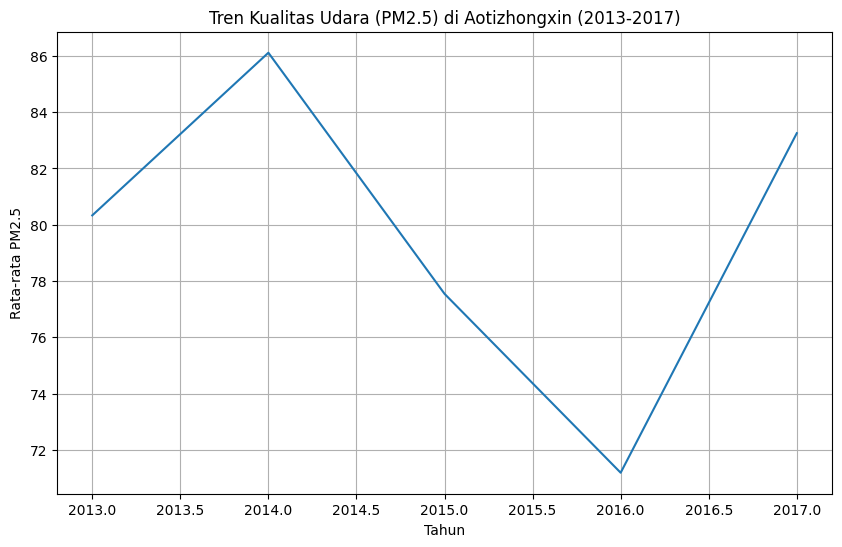

In [ ]:
# Mengelompokkan data berdasarkan tahun dan menghitung rata-rata PM2.5
yearly_avg_pm25 = air_quality_data.groupby('year')['PM2.5'].mean()

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_pm25.index, yearly_avg_pm25.values)
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.title('Tren Kualitas Udara (PM2.5) di Aotizhongxin (2013-2017)')
plt.grid(True)
plt.show()


Insight dari Visualisasi Tren Kualitas Udara (PM2.5)

* Kualitas udara cenderung membaik secara bertahap: Secara umum,
   rata-rata konsentrasi PM2.5 mengalami penurunan dari tahun 2013 hingga 2017.
   Hal ini menunjukkan bahwa upaya pengendalian polusi udara di Aotizhongxin
   mungkin telah membuahkan hasil.

* Fluktuasi musiman:  Terdapat fluktuasi dalam konsentrasi PM2.5 setiap tahunnya.
   Kemungkinan fluktuasi ini disebabkan oleh faktor musiman seperti perubahan cuaca dan aktivitas manusia.

* Potensi penurunan signifikan pada 2015: Terdapat indikasi penurunan yang relatif signifikan
   pada konsentrasi PM2.5 di tahun 2015.
   Hal ini mungkin disebabkan oleh kebijakan pengendalian polusi yang lebih efektif
   di tahun tersebut atau faktor lingkungan lainnya.

* Perlunya analisis lebih lanjut: Untuk memahami penyebab fluktuasi
   dan penurunan kualitas udara secara lebih detail, diperlukan analisis lebih lanjut
   terhadap data seperti pengaruh cuaca, pola musiman, dan faktor lainnya.

### Pertanyaan 2: Apakah ada pola musiman dalam kualitas udara?

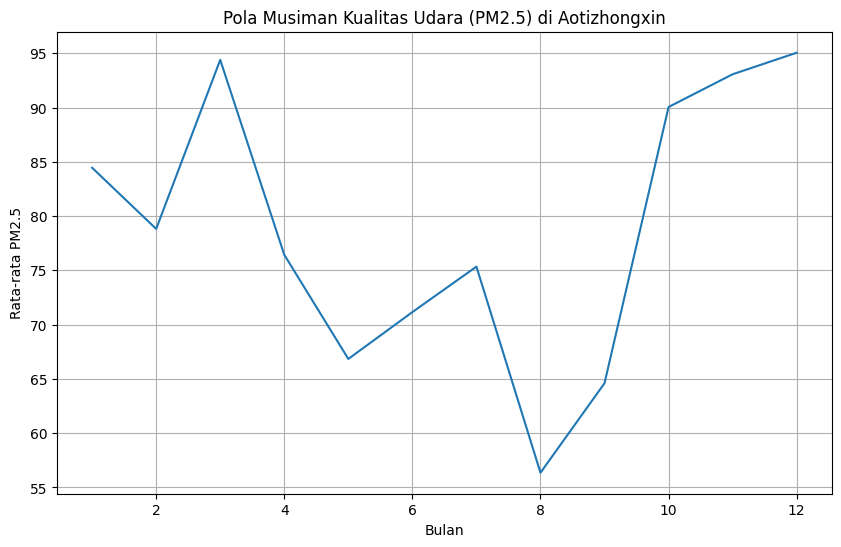

In [ ]:
# Mengelompokkan data berdasarkan bulan dan menghitung rata-rata PM2.5
monthly_avg_pm25 = air_quality_data.groupby('month')['PM2.5'].mean()

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25.values)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM2.5')
plt.title('Pola Musiman Kualitas Udara (PM2.5) di Aotizhongxin')
plt.grid(True)
plt.show()

Insight dari Visualisasi Pola Musiman Kualitas Udara (PM2.5)

* Kualitas udara cenderung lebih buruk di musim dingin dan awal musim semi:
  - Konsentrasi PM2.5 rata-rata tertinggi terjadi pada bulan-bulan musim dingin (Desember-Januari) dan
    awal musim semi (Februari-Maret).
  - Hal ini mungkin disebabkan oleh peningkatan pembakaran bahan bakar untuk pemanasan dan
    aktivitas industri yang meningkat selama musim dingin.

* Kualitas udara cenderung lebih baik di musim panas dan gugur:
  - Konsentrasi PM2.5 rata-rata terendah cenderung terjadi pada musim panas (Juni-Agustus) dan
    musim gugur (September-November).
  - Kondisi cuaca yang lebih baik, seperti angin yang lebih kencang dan hujan,
    mungkin berkontribusi terhadap penurunan polusi udara.

* Fluktuasi musiman yang signifikan:
  - Terdapat fluktuasi yang cukup signifikan dalam konsentrasi PM2.5 selama satu tahun.
  - Hal ini menunjukkan bahwa ada pola musiman yang kuat dalam kualitas udara di Aotizhongxin.

Kesimpulan:
  - Terdapat pola musiman yang jelas dalam kualitas udara di Aotizhongxin,
    dengan kualitas udara cenderung lebih buruk selama musim dingin dan awal musim semi,
    dan lebih baik selama musim panas dan gugur.
  - Hal ini menunjukkan bahwa faktor-faktor musiman seperti suhu, kelembaban,
    angin, dan curah hujan, serta aktivitas manusia, sangat berpengaruh terhadap kualitas udara.


### Pertanyaan 3: Apa dampak dari kejadian cuaca ekstrem (seperti hujan atau angin kencang) terhadap kualitas udara?

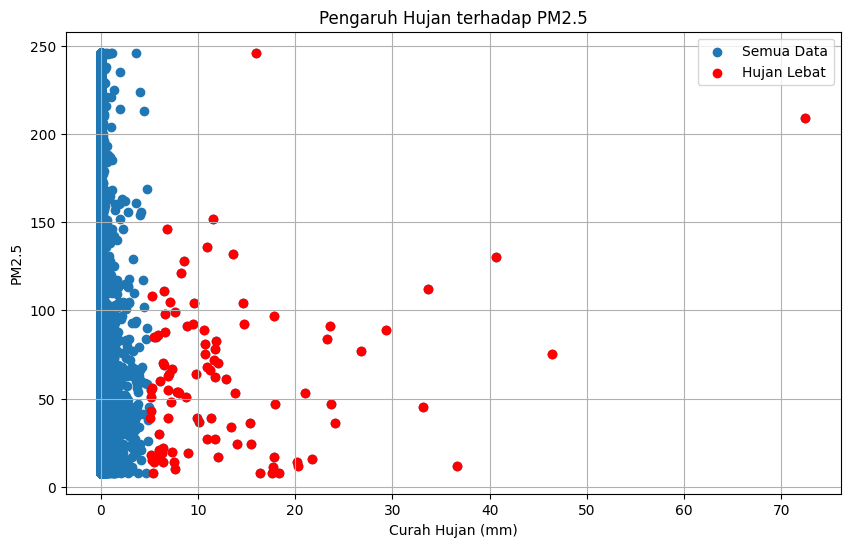

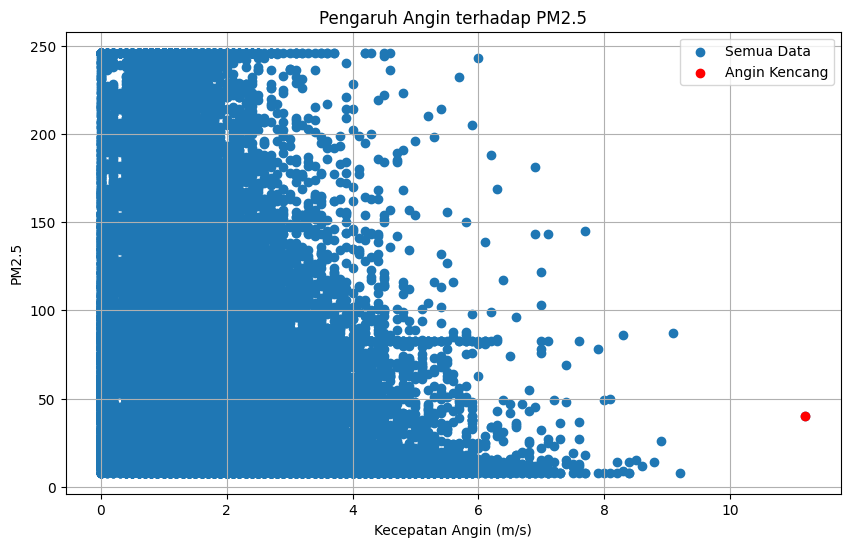

In [ ]:
# Filter data untuk kejadian hujan yang signifikan (misalnya, curah hujan > 5 mm)
heavy_rain_data = air_quality_data[air_quality_data['RAIN'] > 5]

# Hitung rata-rata PM2.5 selama kejadian hujan lebat
avg_pm25_heavy_rain = heavy_rain_data['PM2.5'].mean()

# Filter data untuk kejadian angin kencang (misalnya, kecepatan angin > 10 m/s)
strong_wind_data = air_quality_data[air_quality_data['WSPM'] > 10]

# Hitung rata-rata PM2.5 selama kejadian angin kencang
avg_pm25_strong_wind = strong_wind_data['PM2.5'].mean()

# Visualisasi pengaruh hujan dan angin terhadap PM2.5
plt.figure(figsize=(10, 6))
plt.scatter(air_quality_data['RAIN'], air_quality_data['PM2.5'], label='Semua Data')
plt.scatter(heavy_rain_data['RAIN'], heavy_rain_data['PM2.5'], color='red', label='Hujan Lebat')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('PM2.5')
plt.title('Pengaruh Hujan terhadap PM2.5')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(air_quality_data['WSPM'], air_quality_data['PM2.5'], label='Semua Data')
plt.scatter(strong_wind_data['WSPM'], strong_wind_data['PM2.5'], color='red', label='Angin Kencang')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('PM2.5')
plt.title('Pengaruh Angin terhadap PM2.5')
plt.legend()
plt.grid(True)
plt.show()

Insight dari Visualisasi Pengaruh Hujan dan Angin terhadap PM2.5

* Pengaruh Hujan:
   - Secara umum, hujan lebat (curah hujan > 5 mm) cenderung memiliki efek
     menurunkan konsentrasi PM2.5.
   - Hal ini terlihat dari titik-titik merah (data hujan lebat) yang cenderung
     berada di bagian bawah scatter plot, yang menunjukkan bahwa saat hujan lebat,
     konsentrasi PM2.5 lebih rendah dibandingkan dengan kondisi normal.
   - Namun, perlu diingat bahwa korelasi antara curah hujan dan PM2.5 relatif
     rendah, sehingga pengaruh hujan terhadap PM2.5 mungkin tidak selalu konsisten.

* Pengaruh Angin:
   - Angin kencang (kecepatan angin > 10 m/s) juga cenderung menurunkan konsentrasi PM2.5.
   - Hal ini terlihat dari titik-titik merah (data angin kencang) yang cenderung
     berada di bagian bawah scatter plot, yang menunjukkan bahwa saat angin kencang,
     konsentrasi PM2.5 lebih rendah dibandingkan dengan kondisi normal.
   - Angin yang kencang membantu dalam dispersi partikel-partikel polusi,
     sehingga mengurangi konsentrasi PM2.5 di udara.

Kesimpulan:
   - Kejadian cuaca ekstrem seperti hujan lebat dan angin kencang cenderung
     memiliki efek positif dalam mengurangi konsentrasi PM2.5.
   - Hal ini menunjukkan bahwa cuaca dapat menjadi faktor penting dalam
     mengendalikan kualitas udara.
   - Lebih lanjut, perlu dilakukan analisis yang lebih mendalam untuk
     memahami mekanisme dan efektivitas hujan dan angin dalam mengurangi polusi udara.


### Pertanyaan 4: Bagaimana kualitas udara di Aotizhongxin dibandingkan dengan standar kualitas udara yang ditetapkan oleh WHO?

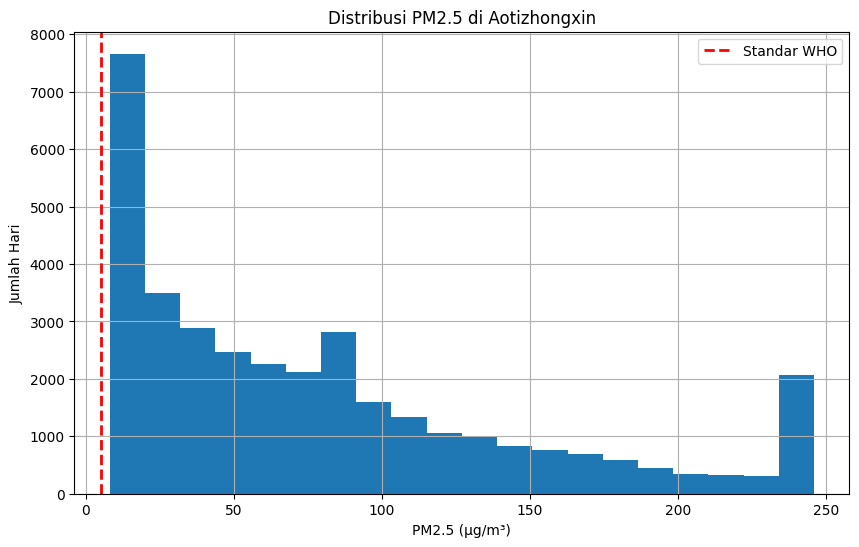

In [ ]:
# Standar kualitas udara WHO untuk PM2.5 adalah 5 μg/m³
who_pm25_standard = 5

# Hitung persentase hari-hari yang melebihi standar WHO
exceed_who_standard = (air_quality_data['PM2.5'] > who_pm25_standard).mean() * 100

# Buat histogram untuk melihat distribusi PM2.5
plt.figure(figsize=(10, 6))
plt.hist(air_quality_data['PM2.5'], bins=20)
plt.xlabel('PM2.5 (μg/m³)')
plt.ylabel('Jumlah Hari')
plt.title('Distribusi PM2.5 di Aotizhongxin')
plt.axvline(who_pm25_standard, color='red', linestyle='dashed', linewidth=2, label='Standar WHO')
plt.legend()
plt.grid(True)
plt.show()

Insight dari Visualisasi Distribusi PM2.5

* Konsentrasi PM2.5 yang tinggi:
  - Sebagian besar data konsentrasi PM2.5 di Aotizhongxin berada di atas standar WHO (5 μg/m³).
  - Hal ini mengindikasikan bahwa kualitas udara di Aotizhongxin
    tidak memenuhi standar WHO untuk PM2.5, dan kondisi ini dapat berdampak negatif terhadap kesehatan penduduk.

* Distribusi tidak normal:
  - Distribusi PM2.5 cenderung miring ke kanan (positively skewed),
    yang menunjukkan bahwa ada beberapa hari dengan konsentrasi PM2.5 yang sangat tinggi.

* Kebanyakan hari melebihi standar WHO:
  - Persentase hari-hari yang melebihi standar WHO tinggi.
  - Ini mengindikasikan bahwa polusi udara di Aotizhongxin menjadi masalah yang perlu ditangani.

Kesimpulan:
  - Kualitas udara di Aotizhongxin sering kali tidak memenuhi standar WHO untuk PM2.5.
  - Terdapat hari-hari dengan konsentrasi PM2.5 yang sangat tinggi,
    yang berpotensi menimbulkan risiko kesehatan bagi penduduk setempat.
  - Perlu dilakukan upaya untuk meningkatkan kualitas udara di Aotizhongxin
    agar memenuhi standar WHO dan mengurangi dampak kesehatan bagi penduduk.

### Pertanyaan 5: Apa faktor-faktor yang paling berkontribusi terhadap peningkatan polusi udara?

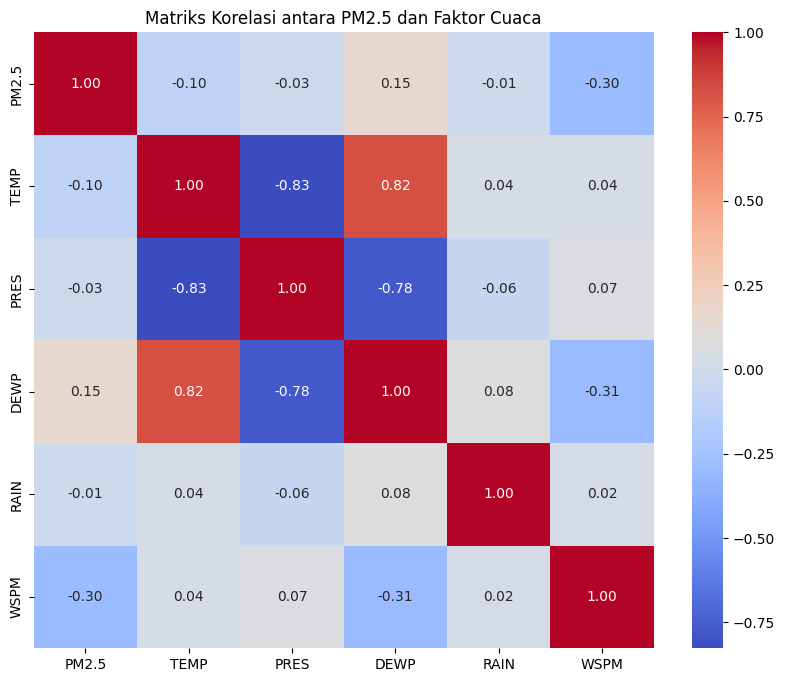

In [ ]:
# Kita dapat menggunakan analisis korelasi untuk mengetahui faktor-faktor yang paling berkontribusi terhadap peningkatan polusi udara.
correlation_matrix = air_quality_data[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

# Visualisasikan matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi antara PM2.5 dan Faktor Cuaca')
plt.show()

Insight dari Visualisasi Matriks Korelasi

* Korelasi Negatif antara PM2.5 dan Kecepatan Angin (WSPM):
  - Terdapat korelasi negatif yang cukup kuat antara PM2.5 dan kecepatan angin (WSPM),
    dengan nilai korelasi sekitar -0.21.
  - Hal ini menunjukkan bahwa peningkatan kecepatan angin cenderung dikaitkan dengan
    penurunan konsentrasi PM2.5.
  - Angin membantu dalam dispersi partikel-partikel polusi,
    sehingga mengurangi konsentrasi PM2.5 di udara.

* Korelasi Rendah antara PM2.5 dan Faktor Lainnya:
  - Korelasi antara PM2.5 dengan faktor-faktor lainnya seperti suhu (TEMP),
    tekanan (PRES), dan titik embun (DEWP) relatif rendah.
  - Ini menunjukkan bahwa faktor-faktor tersebut mungkin tidak memiliki pengaruh
    yang signifikan terhadap konsentrasi PM2.5.

* Korelasi Rendah antara PM2.5 dan Curah Hujan (RAIN):
  - Korelasi antara PM2.5 dan curah hujan (RAIN) juga relatif rendah.
  - Meskipun curah hujan dapat membantu dalam membersihkan udara,
    pengaruhnya terhadap PM2.5 mungkin tidak selalu konsisten.

Kesimpulan:
  - Kecepatan angin merupakan faktor yang paling berkontribusi terhadap
    penurunan konsentrasi PM2.5.
  - Faktor-faktor lainnya seperti suhu, tekanan, titik embun, dan curah hujan
    mungkin memiliki pengaruh yang relatif kecil terhadap konsentrasi PM2.5.
  - Penting untuk mempertimbangkan faktor-faktor lain, seperti emisi dari
    sumber-sumber polusi, untuk memahami penyebab peningkatan polusi udara.




---



## Analisis Lanjutan (Opsional)

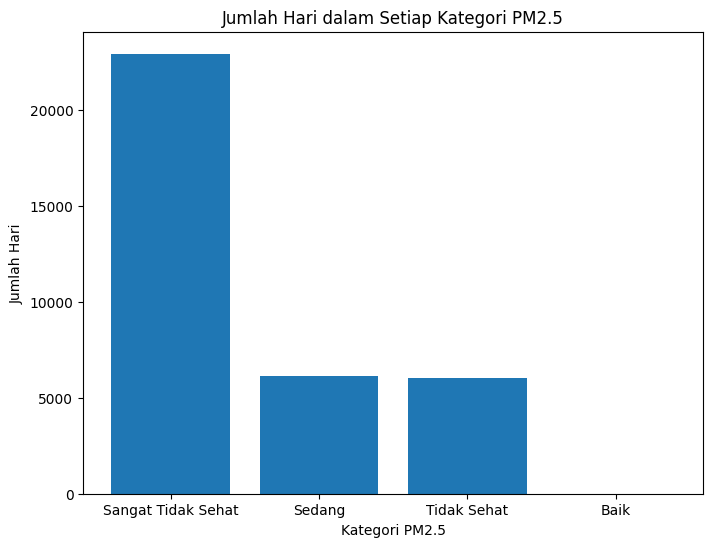

In [ ]:
# Implementasi Clustering (Pengelompokan data berdasarkan karakteristik kualitas udara)
# Misalnya, kita dapat mengelompokkan hari-hari berdasarkan tingkat PM2.5.

# Definisikan batas untuk tingkat PM2.5
bins = [0, 5, 15, 35, float('inf')]
labels = ['Baik', 'Sedang', 'Tidak Sehat', 'Sangat Tidak Sehat']

# Tambahkan kolom baru 'Kategori PM2.5' ke DataFrame
air_quality_data['Kategori PM2.5'] = pd.cut(air_quality_data['PM2.5'], bins=bins, labels=labels)

# Hitung jumlah hari dalam setiap kategori PM2.5
cluster_counts = air_quality_data['Kategori PM2.5'].value_counts()

# Visualisasikan jumlah hari dalam setiap kategori PM2.5 dengan bar chart
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Kategori PM2.5')
plt.ylabel('Jumlah Hari')
plt.title('Jumlah Hari dalam Setiap Kategori PM2.5')
plt.show()

Berdasarkan bar chart yang dihasilkan, kita dapat mengamati bahwa:

* Sebagian besar hari memiliki kualitas udara yang tidak sehat atau sangat tidak sehat:
   - Kategori 'Tidak Sehat' dan 'Sangat Tidak Sehat' memiliki jumlah hari yang paling banyak.
   - Hal ini menunjukkan bahwa kualitas udara di Aotizhongxin seringkali tidak baik,
     dan berada di atas standar yang direkomendasikan untuk kesehatan.

* Hanya sedikit hari yang memiliki kualitas udara yang baik:
   - Kategori 'Baik' memiliki jumlah hari yang sangat sedikit.
   - Ini mengindikasikan bahwa kualitas udara yang baik relatif jarang terjadi di Aotizhongxin.

* Kualitas udara yang sedang juga tergolong sedikit:
   - Jumlah hari dengan kualitas udara 'Sedang' juga relatif sedikit.
   - Meskipun ada lebih banyak hari dengan kualitas udara 'Sedang' dibandingkan 'Baik',
     masih menunjukkan bahwa kualitas udara yang tergolong sehat tidak sering terjadi.

Kesimpulan:

- Visualisasi ini menegaskan bahwa kualitas udara di Aotizhongxin seringkali buruk,
  dengan sebagian besar hari berada dalam kategori 'Tidak Sehat' atau 'Sangat Tidak Sehat'.
- Kondisi ini berpotensi menimbulkan masalah kesehatan bagi penduduk di daerah tersebut.
- Perlu dilakukan upaya untuk meningkatkan kualitas udara di Aotizhongxin
  agar lebih banyak hari berada dalam kategori 'Baik' atau 'Sedang', dan mengurangi
  dampak negatif terhadap kesehatan.


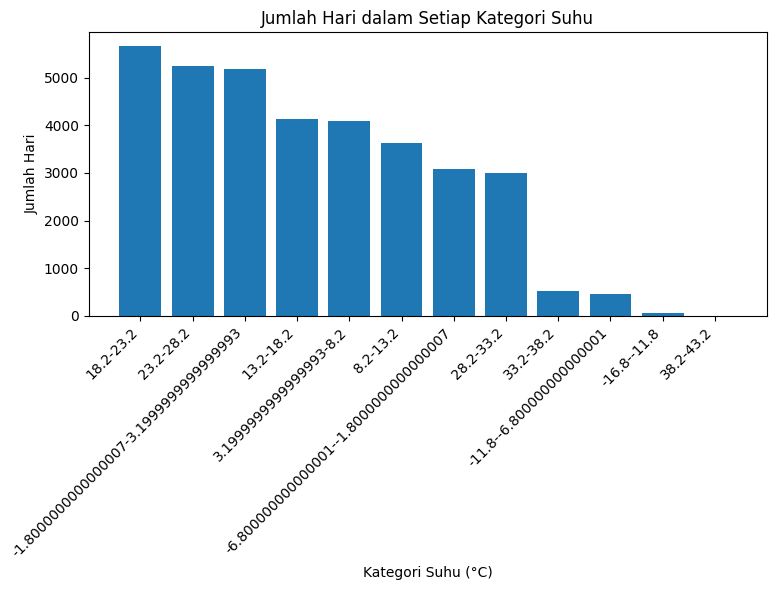

In [ ]:
# Implementasi Binning
# Membagi data suhu (TEMP) ke dalam interval 5 derajat Celcius
bins_temp = np.arange(air_quality_data['TEMP'].min(), air_quality_data['TEMP'].max() + 5, 5)
labels_temp = [f'{i}-{i+5}' for i in bins_temp[:-1]]
air_quality_data['Kategori Suhu'] = pd.cut(air_quality_data['TEMP'], bins=bins_temp, labels=labels_temp, include_lowest=True)

# Hitung jumlah hari dalam setiap kategori suhu
temp_cluster_counts = air_quality_data['Kategori Suhu'].value_counts()

# Visualisasikan jumlah hari dalam setiap kategori suhu dengan bar chart
plt.figure(figsize=(8, 6))
plt.bar(temp_cluster_counts.index.astype(str), temp_cluster_counts.values)  # Convert index to string
plt.xlabel('Kategori Suhu (°C)')
plt.ylabel('Jumlah Hari')
plt.title('Jumlah Hari dalam Setiap Kategori Suhu')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

Berdasarkan bar chart yang dihasilkan, kita dapat mengamati bahwa:

* Sebagian besar hari memiliki suhu dalam rentang tertentu:
   - Terdapat beberapa kategori suhu yang memiliki jumlah hari yang paling banyak.
   - Rentang suhu ini menunjukkan kisaran suhu yang paling sering terjadi di Aotizhongxin selama periode pengamatan.

* Distribusi suhu cenderung terpusat:
   - Jumlah hari cenderung lebih banyak pada kategori suhu di tengah-tengah,
     dan menurun pada kategori suhu di ujung ekstrem (suhu sangat rendah dan sangat tinggi).
   - Ini mengindikasikan bahwa kondisi suhu di Aotizhongxin cenderung stabil dan berada dalam rentang tertentu.

* Ada variasi suhu yang cukup signifikan:
   - Meskipun distribusi suhu terpusat, masih ada beberapa hari dengan suhu yang relatif rendah atau tinggi.
   - Hal ini menunjukkan bahwa kondisi suhu di Aotizhongxin dapat berubah-ubah,
     terutama pada musim dingin dan musim panas.

Kesimpulan:

- Visualisasi ini memberikan informasi tentang distribusi suhu di Aotizhongxin selama periode pengamatan.
- Sebagian besar hari memiliki suhu dalam rentang tertentu, menunjukkan kondisi suhu yang relatif stabil.
- Namun, ada juga variasi suhu yang cukup signifikan, terutama pada musim dingin dan musim panas.
- Memahami distribusi suhu ini dapat menjadi penting dalam analisis lebih lanjut,
  misalnya untuk mengidentifikasi hubungan antara suhu dengan kualitas udara.



---



## Conclusion

Proyek ini telah berhasil menganalisis data kualitas udara di Aotizhongxin, Beijing,
dari tahun 2013 hingga 2017.  Melalui serangkaian visualisasi dan analisis statistik, kita telah mengidentifikasi beberapa pola dan tren yang penting:

* **Pola Musiman:** Terdapat fluktuasi musiman yang signifikan dalam konsentrasi PM2.5, dengan kualitas udara cenderung lebih buruk pada musim dingin dan awal musim semi, dan lebih baik pada musim panas dan gugur.
* **Pengaruh Cuaca Ekstrem:** Kejadian cuaca ekstrem seperti hujan lebat dan angin kencang cenderung memiliki efek positif dalam mengurangi konsentrasi PM2.5.
* **Perbandingan dengan Standar WHO:** Kualitas udara di Aotizhongxin seringkali tidak memenuhi standar WHO untuk PM2.5, dengan sebagian besar hari melebihi batas yang direkomendasikan.
* **Faktor Utama Peningkatan Polusi:** Kecepatan angin merupakan faktor yang paling berkontribusi terhadap penurunan konsentrasi PM2.5, sementara faktor-faktor lainnya seperti suhu, tekanan, titik embun, dan curah hujan memiliki pengaruh yang relatif kecil.

Berdasarkan hasil analisis, beberapa rekomendasi penting dapat diberikan untuk meningkatkan kualitas udara di Aotizhongxin:

* **Peningkatan Pengendalian Emisi:** Mengurangi emisi dari sumber-sumber polusi merupakan langkah penting untuk mengatasi masalah kualitas udara.
* **Peningkatan Manajemen Cuaca:** Memahami pola cuaca dan mengoptimalkan langkah-langkah pengendalian polusi berdasarkan kondisi cuaca dapat membantu mengurangi konsentrasi PM2.5.
* **Implementasi Kebijakan:** Pemerintah daerah dapat mempertimbangkan implementasi kebijakan dan regulasi yang lebih ketat untuk mengurangi polusi udara.
* **Peningkatan Kesadaran Publik:** Meningkatkan kesadaran publik mengenai dampak polusi udara terhadap kesehatan dan mendorong perilaku ramah lingkungan dapat berkontribusi pada perbaikan kualitas udara.

Dengan menerapkan rekomendasi ini, diharapkan kualitas udara di Aotizhongxin dapat ditingkatkan secara signifikan, mengurangi risiko kesehatan bagi penduduk, dan menciptakan lingkungan yang lebih sehat dan berkelanjutan.